In [22]:
%reset -f

In [12]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [13]:
%gui qt

# Assignment B - RhoA activation and inhibition analysis using FRET
### Author: Aoming Sun
### Date: 7th June, 2023

In [23]:
#Libraries
import numpy as np
import numpy.ma as ma
from scipy import ndimage
from skimage import exposure, transform, io, util
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import tifffile as tif
import PIL
import napari
from skimage.registration import phase_cross_correlation
from skimage.transform import AffineTransform, warp
from scipy.ndimage import fourier_shift

## Import and inspect the image data

In [24]:
#Start coding here
filepath ='W47-SGFP2-mScarlet-I-01-1_2channels.tif'
image = io.imread(filepath)
#End coding here

## Extract both the donor and acceptor channels (donor = channel 1 and acceptor = channel 2)

In [25]:
# Start coding here
donor_channel = image[1, :, :]
acceptor_channel = image[2, :, :]
# End coding here

## Calclate and plot the z-projections (use mean) of both channels

In [26]:
# Start coding here
z_project_donor = np.mean(donor_channel, axis=0)
z_project_acceptor = np.mean(acceptor_channel, axis=0)
# End coding here

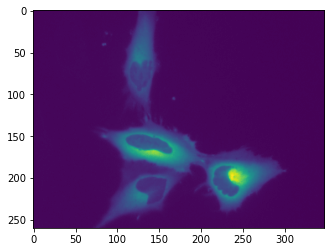

In [28]:
# Plot z-projections
plt.imshow(z_project_donor)
plt.show()

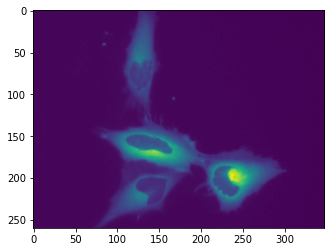

In [27]:
plt.imshow(z_project_acceptor)
plt.show()

## Extract background mask (region with no cell(s))
Refer to Tutorial 2 for steps to create mask of region of interest (ROI)

In [7]:
viewer = napari.Viewer()

C:\Users\nikos\anaconda3\lib\site-packages\napari\_qt\__init__.py:50: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


In [8]:
viewer.add_image(z_project_donor, name='Donor Channel')
viewer.add_image(z_project_acceptor, name='Acceptor Channel')

<Image layer 'Acceptor Channel' at 0x2f7716b18b0>

In [9]:
viewer.add_shapes(name='Background Mask')

<Shapes layer 'Background Mask' at 0x2f774727610>

In [ ]:
# Start coding here
background_mask =

# End coding here

## Calculate average background intensity and also the standard deviation for all time frames and both channels. Plot them vs time.

In [ ]:
# Mean and std dev calculation
# Start coding here
mean_donor = 
mean_acceptor = 
stddev_donor = 
stddev_acceptor = 


# End coding here

In [ ]:
#Plotting 
plt.plot(mean_donor,label='donor')
plt.plot(mean_acceptor,label='acceptor')
# Set the labels
plt.xlabel('time')
plt.ylabel('intensity')
# Set the legend
plt.legend()
plt.show()
plt.close()

plt.plot(stddev_donor,label='donor')
plt.plot(stddev_acceptor,label='acceptor')
plt.xlabel('time')
plt.ylabel('intensity')

# Set the legend
plt.legend()
plt.show()

## Image processing steps

In [ ]:
#Initializing parameters

# Define a smoothing kernel
ks = (3,3) # kernel size should be a tuple
kernel = np.ones(ks) / np.prod(ks) # create box filter kernel

# Initialize output array
corrected_frames = np.zeros_like(image,dtype=np.float64)

In [ ]:
#Preparing the image data
# Convert pixel type to float
image = image.astype(np.float64)

# Channels extraction
donor_channel = image[:,0,:,:]
acceptor_channel = image[:,1,:,:]

In [ ]:
#Now they begin - image processing

for t in range(image.shape[0]):
    
    #######################################
    ##Background substraction
    #Start coding here
    donor_channel[t, :, :] =
    acceptor_channel[t, :, :] =

    #######################################
    ##Image registration
    #Calculate the shift between the two images
    shift, error, diffphase = 

    #Create an affine transform object with the shift
    tform = 

    #Apply the transformation to the image 
    corrected_image = 

    # Replace the original channel with the corrected channel
    acceptor_channel[t, :, :] = corrected_image

    #######################################
    ##Image processing steps to reduce noise
    ##Smoothing (hint: use the created kernel)
    donor_channel[t, :, :] = 
    acceptor_channel[t, :, :] = 

    #Thresholding so that pixels with low signal are assigned with np.nan. 
    #Use the background mean and standard deviation intensity in this step to form a threshold value
    
    #Well done. Let's keep the corrected frames
    corrected_frames[t, 1, :, :] = acceptor_channel[t, :, :]
    corrected_frames[t, 0, :, :] = donor_channel[t, :, :]
    print(f'{t} of {image.shape[0]}')
        

    # End coding here

In [ ]:
#Plotting
plt.imshow(corrected_frames[12, 0,:,:])
plt.show()

In [ ]:
# Calculate FRET ratios. R = Acceptor/Donor
# Start coding here
ratio = 


# End coding here

#Plot a layer
plt.imshow(ratio[12,:,:])
plt.show()

In [ ]:
# Export the FRET ratios images as an animated gif 
# Start coding here


# End coding here